In [4]:
import numpy as np
import pandas as pd

In [5]:
try:
    df = pd.read_csv('spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('spam.csv', encoding='ISO-8859-1') 
    except UnicodeDecodeError:
        df = pd.read_csv('spam.csv', encoding='cp1252')

1. Data cleaning  

In [6]:
df.info() 
# The .info() method in Python, used with a Pandas DataFrame, provides a concise summary of the DataFrame. It includes details such as the number of non-null entries, column names, data types, and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 cols having very less non null / valid values (i.e. having missing values)
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace=True)

In [8]:
# rename
df.rename(columns={'v1':'target' , 'v2':'text'} , inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

# from sklearn.preprocessing import LabelEncoder: Import the LabelEncoder class from scikit-learn's preprocessing module.
# encoder = LabelEncoder(): Create an instance of LabelEncoder, which will be used to perform label encoding.
# df['target'] = encoder.fit_transform(df['target']): Apply label encoding to the 'target' column of the DataFrame df. The fit_transform() method of the LabelEncoder instance encoder is used to transform the categorical labels in 'target' into numerical representations, and the result is stored back into the 'target' column of df.

In [10]:
df.head()
# This dataset usually contains messages labeled as either spam (1) or not spam (0)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# check duplicate value
df.duplicated().sum()
# calculates the total number of duplicate rows in the DataFrame 'df'

# remove duplicates
df = df.drop_duplicates(keep='first')
# 'df' will contain only unique rows, with the first occurrence of each duplicated row preserved.

In [12]:
df['target'].value_counts()
# method in pandas, used to count the unique values in a Series

target
0    4516
1     653
Name: count, dtype: int64

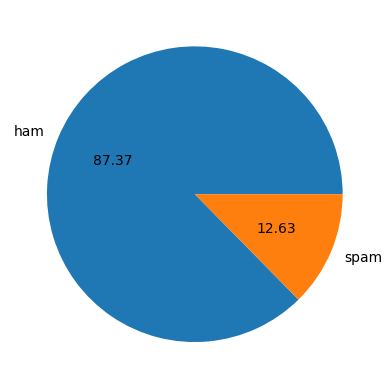

In [13]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
#  'autopct="%0.2f"' makes the pie chart display percentages of floating-point number with its two decimal places. 
plt.show()

In [14]:
import nltk
from nltk.corpus import stopwords
# provides lists of common stopwords (e.g., "the", "is", "in") for various languages.
import string
from nltk.stem import PorterStemmer
# provides an implementation of the 'Porter Stemming' algorithm used for reducing words to their root form.
ps = PorterStemmer()

In [15]:
nltk.download('punkt')
# The punkt tokenizer in NLTK is a pre-trained unsupervised machine learning model used for sentence tokenization, splitting text into sentences based on punctuation and capitalization patterns.

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [16]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [17]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
df[['num_characters','num_words','num_sentences']].describe()
# Using describe() provides a quick overview of the distribution and central tendency of your data, helping to identify patterns and outliers.

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [21]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

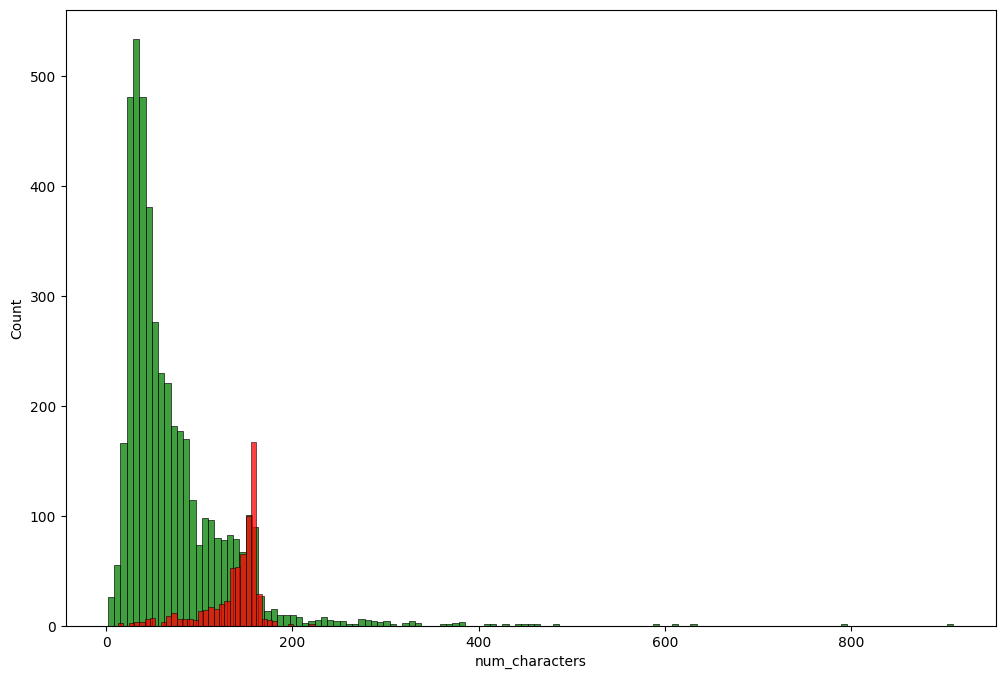

In [44]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0]['num_characters'] , color='green')
sns.histplot(df[df['target'] == 1]['num_characters'] , color='red')

<Axes: xlabel='num_words', ylabel='Count'>

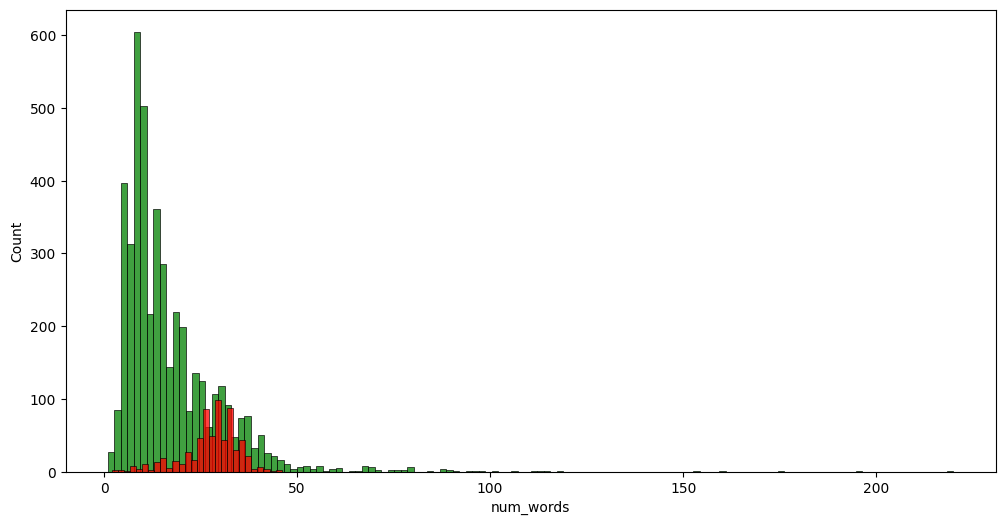

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'] , color='green')
sns.histplot(df[df['target'] == 1]['num_words'] , color='red')

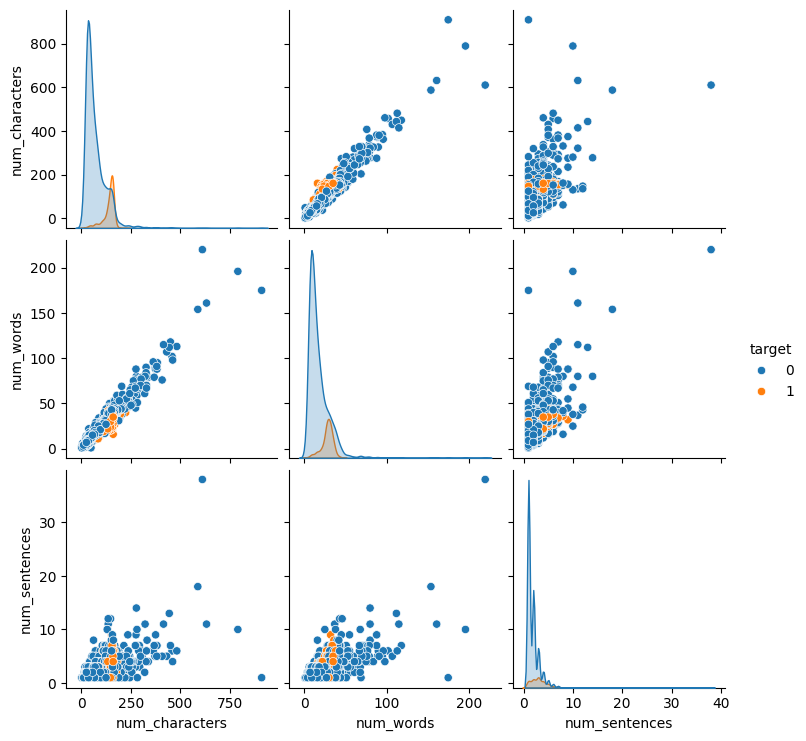

In [24]:
sns.pairplot(df,hue='target')
# pairplot(): This function generates a grid of scatterplots, where each variable in the DataFrame is plotted against every other variable. It allows you to quickly visualize relationships and distributions within the dataset.
# Each unique value in the 'target' column will be assigned a different color, allowing you to visually distinguish between different categories in your data.

3. Data Preprocessing

In [25]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
# text.lower(): Converts all characters in the variable text to lowercase
# nltk.word_tokenize(text): Tokenizes the lowercase text into individual words using NLTK's word_tokenize function. Tokenization splits the text into words, creating a list of words that can be further processed or analyzed.    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)    
    text = y[:]
    y.clear()
# retaining only those words , containing alphanumeric characters. The cleaned words are then stored back in the 'text' variable. This process effectively removes non-alphanumeric characters from the text data.    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)         
    text = y[:]
    y.clear()
# remove stopwords and punctuation from the 'text' data, leaving only meaningful words for further analysis.   
    for i in text:
        y.append(ps.stem(i))
# apply stemming to each word in the list 'text' using NLTK's Porter stemming algorithm ('ps.stem()'). The stemmed words are then stored in the list 'y'.          
    return " ".join(y)
# joins the stemmed words stored in the list y into a single string, separated by spaces, and returns the resulting string.

df['transformed_text'] = df['text'].apply(transform_text)
# applies text transformation to each text entry in the DataFrame's 'text' column and stores the transformed text in a new column 'transformed_text'

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [26]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

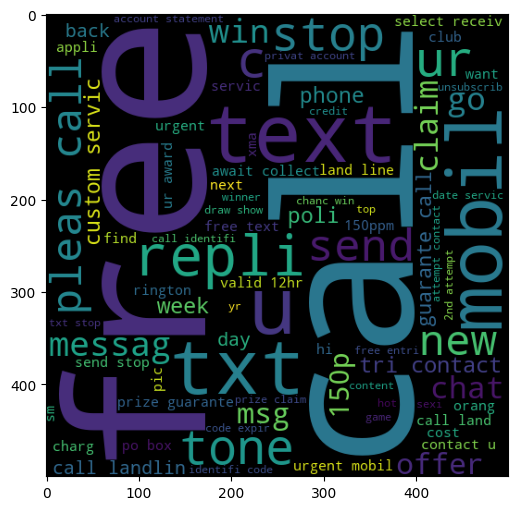

In [27]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

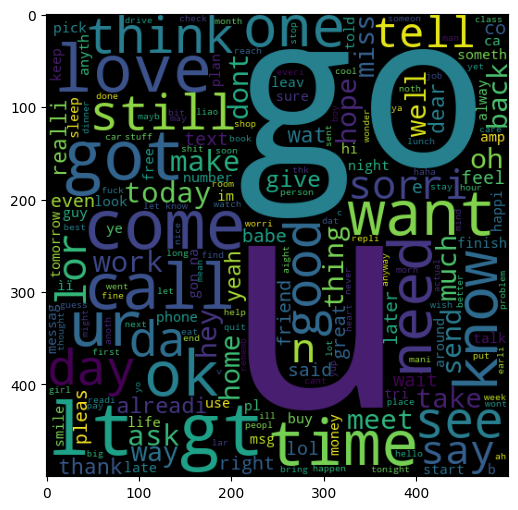

In [28]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

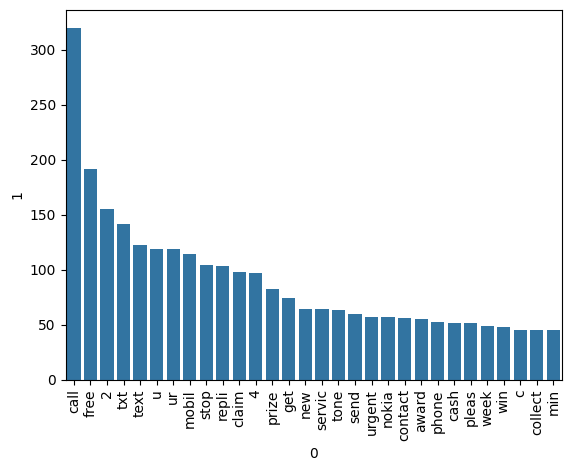

In [29]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)
# total count of words present in the spam messages

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
# a bar plot showing the 30 most common words in the 'spam_corpus'

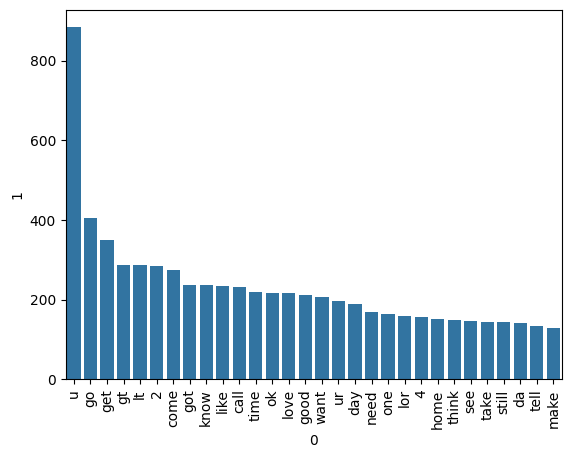

In [30]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
len(ham_corpus)

from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()
# a bar plot showing the 30 most common words in the 'ham_corpus'

4. Model Building

In [31]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB() # Suitable for continuous data
mnb = MultinomialNB() # Suitable for discrete data, particularly for word counts in text classification
bnb = BernoulliNB() # Suitable for binary/Boolean features (0 or 1)

In [33]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [34]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [35]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

#  'clf' is a common abbreviation for classifier
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [37]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [38]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\ranja\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [39]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


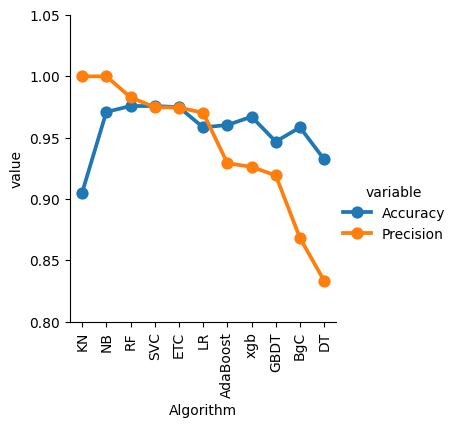

In [40]:
performance_df1 = pd.melt(performance_df, id_vars='Algorithm', value_vars=['Accuracy', 'Precision'])
# 'pd.melt()': unpivots DataFrame from wide format to long format, making it easier to plot multiple variables
sns.catplot(x = 'Algorithm', y='value', hue = 'variable', data = performance_df1, kind ='point',height = 3.8)
plt.ylim(0.8 , 1.05)
# 'plt.ylim()': sets the limits of the y-axis
plt.xticks(rotation = 'vertical')
plt.show()

5. Model Improvisation

In [41]:
# 1. Change the max_features parameter of TfIdf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [42]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


In [43]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
# 'tfidf' seems to be a TF-IDF vectorizer object, which is commonly used in Natural Language Processing (NLP) tasks to convert a collection of raw documents into a matrix of TF-IDF features.
pickle.dump(mnb,open('model.pkl','wb'))
# 'mnb' seems to be a Multinomial Naive Bayes classifier object, which is a simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

# These objects are being saved into files named 'vectorizer.pkl' and 'model.pkl' respectively using 'pickle.dump()'. The 'wb' mode stands for "write binary", indicating that the files will be written in binary mode. 